## Spam Filtering

To Do
Remove Non-ASCII from mail
Vowpal Wabbit
Custom Rules
More Data
Top 15 words > 0.8/0.9


#### The GOAL is to classify the testing set for ham/spam. 
<br> TR-mails.zip FILES contains 2500 mails both in Ham(1721) labelled as 1 and Spam(779) labelled as 0.
<br> TT-mails.zip FILES contains 1827 mails both in Ham and Spam
<br> The file spam-mail.tr.label is the associated training labels.

In [1]:
import numpy as np
import os
XTrain = np.loadtxt('spam-mail.tr.label', skiprows=1, delimiter=',', dtype='str')
YTrain = XTrain[:,-1]
YTrain = YTrain.astype(np.int)
XTrainFileNames = XTrain[:,0]
XTestFileNames = XTrain[:1827,0]
print XTrainFileNames.shape, YTrain.shape, XTestFileNames.shape
print XTrainFileNames[:5],YTrain[:5]
trainFolder = os.getcwd()+os.sep+'TR-mails'+os.sep+'TR'+os.sep
testFolder = os.getcwd()+os.sep+'TT-mails'+os.sep+'TT'+os.sep
print trainFolder,testFolder
# with open(trainFolder+'TRAIN_'+XTrainFileNames[0]+'.eml','r') as f:
#     print f.readlines(),len(f.readlines())
    
# for sample in XTrain:
#     with open

(2500,) (2500,) (1827,)
['1' '2' '3' '4' '5'] [0 0 1 0 0]
/media/Documents/TUM/Winter_2015/Anomaly_Detection_Challenge/Anomaly-Detection/Challenges/Spam Filtering Challenge 4/TR-mails/TR/ /media/Documents/TUM/Winter_2015/Anomaly_Detection_Challenge/Anomaly-Detection/Challenges/Spam Filtering Challenge 4/TT-mails/TT/


In [2]:
import email
with open(trainFolder+'TRAIN_'+XTrainFileNames[0]+'.eml','r') as f:
#     print f.readlines(),len(f.readlines())
    message = email.message_from_file(f)
#     headers = email.message_from_file(f, headersonly)T
print message#,headers
print type(message)#,type(headers)
#     parser = email.parser.Parser(f)
# print dir(parser)

From nobody Wed Jan  6 23:59:51 2016
Return-Path: ler@lerami.lerctr.org
Delivery-Date: Fri Sep 13 23:14:55 2002
Return-Path: <bengreen@mindupmerchants.com>
Received: from mindupmerchants.com
 (pDepriver@24-205-211-91.rno-cres.charterpipeline.net [24.205.211.91])
 by lerami.lerctr.org (8.12.2/8.12.2/20020902/$Revision: 1.30 $) with ESMTP id
 g8E4EZE9029281
 for <ler@lerctr.org>; Fri, 13 Sep 2002 23:14:48 -0500 (CDT)
Message-Id: <200209140414.g8E4EZE9029281@lerami.lerctr.org>
Received: from 192.168.0.0 by mindupmerchants.com
 with SMTP (MDaemon.PRO.v6.0.7.R)
 for <ler@lerctr.org>; Fri, 13 Sep 2002 21:13:21 -0700
From: "Ben Green" <bengreen@mindupmerchants.com>
To: ler@lerctr.org
Subject: One of a kind Money maker! Try it for free!
Date: Fri, 13 Sep 2002 21:13:19 -0700
X-M5MailerProjectID: 4fb0caa2-c329-4c20-b331-229e681acee3
Reply-To: bengreen@mindupmerchants.com
MIME-Version: 1.0
Content-Type: multipart/mixed;
	boundary="----000000000000000000000"
X-Return-Path: bengreen@mindupmerchants

In [3]:
print message.keys()
print message.values()
print message['Return-Path'], message['Message-Id']
print message['Received']
print message['Subject']

['Return-Path', 'Delivery-Date', 'Return-Path', 'Received', 'Message-Id', 'Received', 'From', 'To', 'Subject', 'Date', 'X-M5MailerProjectID', 'Reply-To', 'MIME-Version', 'Content-Type', 'X-Return-Path', 'X-MDaemon-Deliver-To', 'X-Virus-Scanned', 'X-Status', 'X-Keywords']
['ler@lerami.lerctr.org', 'Fri Sep 13 23:14:55 2002', '<bengreen@mindupmerchants.com>', 'from mindupmerchants.com (pDepriver@24-205-211-91.rno-cres.charterpipeline.net [24.205.211.91])\n\tby lerami.lerctr.org (8.12.2/8.12.2/20020902/$Revision: 1.30 $) with ESMTP id g8E4EZE9029281\n\tfor <ler@lerctr.org>; Fri, 13 Sep 2002 23:14:48 -0500 (CDT)', '<200209140414.g8E4EZE9029281@lerami.lerctr.org>', 'from 192.168.0.0 by mindupmerchants.com\n\twith SMTP (MDaemon.PRO.v6.0.7.R)\n\tfor <ler@lerctr.org>; Fri, 13 Sep 2002 21:13:21 -0700', '"Ben Green" <bengreen@mindupmerchants.com>', 'ler@lerctr.org', 'One of a kind Money maker! Try it for free!', 'Fri, 13 Sep 2002 21:13:19 -0700', '4fb0caa2-c329-4c20-b331-229e681acee3', 'bengreen

In [4]:
parser = email.parser.HeaderParser()
headers = parser.parsestr(message.as_string())
for h in headers.items():
    print h
print type(headers), dir(headers), len(headers)

('Return-Path', 'ler@lerami.lerctr.org')
('Delivery-Date', 'Fri Sep 13 23:14:55 2002')
('Return-Path', '<bengreen@mindupmerchants.com>')
('Received', 'from mindupmerchants.com\n (pDepriver@24-205-211-91.rno-cres.charterpipeline.net [24.205.211.91])\n by lerami.lerctr.org (8.12.2/8.12.2/20020902/$Revision: 1.30 $) with ESMTP id\n g8E4EZE9029281\n for <ler@lerctr.org>; Fri, 13 Sep 2002 23:14:48 -0500 (CDT)')
('Message-Id', '<200209140414.g8E4EZE9029281@lerami.lerctr.org>')
('Received', 'from 192.168.0.0 by mindupmerchants.com\n with SMTP (MDaemon.PRO.v6.0.7.R)\n for <ler@lerctr.org>; Fri, 13 Sep 2002 21:13:21 -0700')
('From', '"Ben Green" <bengreen@mindupmerchants.com>')
('To', 'ler@lerctr.org')
('Subject', 'One of a kind Money maker! Try it for free!')
('Date', 'Fri, 13 Sep 2002 21:13:19 -0700')
('X-M5MailerProjectID', '4fb0caa2-c329-4c20-b331-229e681acee3')
('Reply-To', 'bengreen@mindupmerchants.com')
('MIME-Version', '1.0')
('Content-Type', 'multipart/mixed;\n\tboundary="----000000000

In [5]:
import email
with open(trainFolder+'TRAIN_'+XTrainFileNames[0]+'.eml','r') as f:
#     print f.readlines(),len(f.readlines())
    message = email.message_from_file(f)
    # parser.parse()

### Extract message body

In [6]:
def getEmailBody(messageStr):
    b = email.message_from_string(messageStr)
    strPayload = ''
    if b.is_multipart():
        for payload in b.get_payload():
            # if payload.is_multipart(): ...
            strPayload += str(payload.get_payload())
    else:
        strPayload += str(b.get_payload())
    return strPayload

In [7]:
def readEmailBody(XTrainFileNames, folder, fileString='TRAIN_'):
    trainEmailBody = []
    for emailFileName in XTrainFileNames:
        with open(folder+fileString+emailFileName+'.eml','r') as f:
            message = email.message_from_file(f)
            trainEmailBody.append(getEmailBody(message.as_string()))
    return trainEmailBody

In [8]:
trainEmailBody = readEmailBody(XTrainFileNames, trainFolder, 'TRAIN_')

In [9]:
print trainEmailBody[:3]
print len(trainEmailBody)

['<body lang=EN-US>\n\n<div class=Section1>\n\n\n<p class=MsoBodyText style=\'text-align:justify\'><b>CONSANTLY</b> being\nbombarded by so-called \x93FREE\x94 money-making systems that teases you with limited\ninformation, and when it\x92s all said and done, blind-sides you by demanding your\nmoney/credit card information upfront in some slick way,<b> after-the-fact</b>!\nYes, I too was as skeptical about such offers and the Internet in general with\nall its hype, as you probably are. Fortunate for me, my main business\nslowed-down (<i>I have been self-employed all my life</i>), so I looked for\nsomething to fit my lifestyle and some other way to assist me in paying my\nbills, without working myself to death or loosing more money; then, this\nproposal to try something new without any upfront investment (<i>great! because\nI had none</i>) interested me to click on the link provided. And I don\x92t regret\nat all that I did! I am very happy, and happy enough to recommend it to you as\na 

In [10]:
testEmailBody = readEmailBody(XTestFileNames, testFolder, 'TEST_')

In [11]:
print testEmailBody[:3]
print len(testEmailBody)

['At 1:16 AM -0400 on 10/3/02, Gary Lawrence Murphy wrote:\n\n\n>   "The first question I ask myself when something doesn\'t seem to be\n>   beautiful is why do I think it\'s not beautiful. And very shortly you\n>   discover that there is no reason." -- John Cage\n\n"When I\'m working on a problem, I never think about beauty. I think only\nhow to solve the problem. But when I have finished, if the solution is not\nbeautiful, I know it is wrong."  -- R. Buckminster Fuller\n\n"Simplicity is the highest goal, achievable when you have overcome all\ndifficulties." -- Frederic Chopin\n\n"Externalities are the last refuge of the dirigistes." -- Friedrich Hayek\n\n-- \n-----------------\nR. A. Hettinga <mailto: rah@ibuc.com>\nThe Internet Bearer Underwriting Corporation <http://www.ibuc.com/>\n44 Farquhar Street, Boston, MA 02131 USA\n"The stoical scheme of supplying our wants by lopping off our\ndesires is like cutting off our feet when we want shoes."\n -- Jonathan Swift\n\n\n', "Have you tr

### Spamicity of a word - Analyse the words of each email message against the classification labels.¶

In [12]:
from collections import Counter
def AnalyseWordLabelContribution(XMessages, YTrain):
    XFeaturesSpam = []
    XFeaturesHam = []
    i = 0
    for message in XMessages:
        if message == None: 
            continue
#             if YTrain[i] == 0:
#                 XFeaturesSpam.append((word, YTrain[i]))
#             else:
#                 XFeaturesHam.append((word, YTrain[i]))        
        else:
            wordList = message.split()
            for word in wordList:
                if(YTrain[i] == 0):
                    XFeaturesSpam.append((word.lower(), YTrain[i]))
                elif (YTrain[i] == 1):
                    XFeaturesHam.append((word.lower(), YTrain[i]))

            i+=1
    return Counter(XFeaturesSpam), Counter(XFeaturesHam)


In [13]:
# Compute Spamicity
def computeSpamicity(XFeaturesSpam, XFeaturesHam, noOfSpamWords = 20):
    XFeatures = {}
    for key in XFeaturesSpam.keys():
        word = key[0]
    #     print word, XFeaturesSpam[key], XFeaturesHam[(word, 1)]
        spamicity = float(XFeaturesSpam[key]) / float(XFeaturesSpam[key] + XFeaturesHam[(word, 1)])
        XFeatures[word] = spamicity

    # Sort and pick top most spam words as features
    from operator import itemgetter, attrgetter    
    descSortedFeatures = sorted(XFeatures.items(), key=itemgetter(1), reverse = True)

    # Select the top most frequent spam word
    spamWordsTaken = [x for x in descSortedFeatures[0:noOfSpamWords]]
    return spamWordsTaken

In [14]:
# Compute Spamicity for each word
def computeSpamicityWords(XFeaturesSpam, XFeaturesHam):
    XFeatures = {}
    for key in XFeaturesSpam.keys():
        word = key[0]
    #     print word, XFeaturesSpam[key], XFeaturesHam[(word, 1)]
        spamicity = float(XFeaturesSpam[key]) / float(XFeaturesSpam[key] + XFeaturesHam[(word, 1)])
#         hamicity = 1-spamicity
        XFeatures[word] = spamicity
    return XFeatures

In [15]:

# X = ['Why Spend upwards of $4000 on a DVD Burner when we will show you an alternative that will do the exact same thing for just a fraction of the cost? Copy your DVD\'s NOW. Best Price on the net. Click here: http://002@www.dvdcopyxp.com/cgi-bin/enter.cgi?marketing_id=dcx009 Click to remove http://003@www.spambites.com/cgi-bin/enter.cgi?spambytes_id=100115',
#      '> On 05/09/2010 03:49 PM, Merciadri Luca wrote:>> Ron Johnson wrote:>>> I just opened a new Writer 3.2.0-9+b1 document then selected the>>> "title image" http://i.space.com/images/080702-voyager-01.jpg from>>> http://www.space.com/missionlaunches/nasa-tracking-voyager2-problem-100506.html>>> and pasted it into the document.>> I am using OO 2.4.1.>> That\'s *really* old.  If you run Stable, then you should deinstall it> and get binaries from http://www.go-oo.orgOk. I will do it. Would it be that?>>                       Take for example>> http://en.wikipedia.org/wiki/California.>> Still works, although OOo doesn\'t seem to know how to handle svg> documents.Lucky you, but it must be because of the version. Note that it doesnot _always_ hang here, that\'s purely random.- -- Merciadri LucaSee http://www.student.montefiore.ulg.ac.be/~merciadri/',
#      'Enhance your desire, pleasure and performance! 100% GUARANTEED TO SEE AN INCREASE IN SIZE AND WIDTH http://pg.exqumloaf.com/']
# YTrain = [0,1,0]
# XFeaturesSpam, XFeaturesHam = AnalyseWordLabelContribution(X, YTrain)
# # print XFeaturesSpam

# spamWordsTaken = computeSpamicity(XFeaturesSpam, XFeaturesHam, 10)
# print spamWordsTaken


### Extract Email Subjects

In [16]:
def extractEmailSubjects(folder,fileString, emailFileName):
    with open(folder+fileString+emailFileName+'.eml','r') as f:
        message = email.message_from_file(f)
    return message['Subject']


In [17]:
def readSubjects(XTrainFileNames, trainFolder, fileString='TRAIN_'):
    trainSubjects = []
    for fileName in XTrainFileNames:
        trainSubjects.append(extractEmailSubjects(trainFolder,fileString,fileName))
#     print len(trainSubjects)
#     print trainSubjects[:5]
    return trainSubjects
trainSubjects = readSubjects(XTrainFileNames, trainFolder, 'TRAIN_')
print len(trainSubjects)

2500


In [18]:
type(YTrain)
type(YTrain[0])
YTrain = YTrain.astype(np.int)
type(YTrain[0])

numpy.int64

### Get Spamicity of words based on Email Subject

In [20]:
XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(trainSubjects, YTrain)
# print XFeaturesSpam

SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
print len(SubjectWordsSpamicity)
print SubjectWordsSpamicity

2113
{'-70%': 1.0, 'update.': 1.0, '$1.99': 1.0, 'oldest': 1.0, '$4,000/month': 1.0, 'increase': 1.0, 'penile': 1.0, 'trail)cokxwej': 1.0, 'casino,': 1.0, 'seriously': 0.5, 'winfrey': 0.75, '@': 1.0, 'updated': 0.1111111111111111, 'risk': 0.6666666666666666, 'today?': 1.0, 'internet': 0.23529411764705882, 'every': 0.42857142857142855, 'jacob': 1.0, 'today.': 0.5, 'wju': 1.0, 'tickets': 1.0, 'school': 0.25, 'propecia': 1.0, 'skills': 0.6666666666666666, 'problems,': 1.0, 'problems.': 0.6666666666666666, 'solution': 0.5, 'frozen': 1.0, 'crotch': 1.0, '#34': 1.0, 'exmh/nmh': 1.0, 'enjoy': 0.6666666666666666, '$19.99': 1.0, 'pulso': 1.0, 'tired': 0.3333333333333333, '$6.50': 1.0, 'direct': 1.0, '27.': 1.0, 'elegant': 1.0, 'her?': 1.0, 'currie': 1.0, 'errors': 0.25, '+': 0.09090909090909091, 'revolutionize': 1.0, 'fetish': 1.0, 'tips': 0.5, 'increasing': 0.3333333333333333, 'officially': 1.0, 'succumb': 1.0, 'args': 0.3333333333333333, 'never': 0.8, 'residual': 1.0, 'here': 0.75, 'hundreds'

In [21]:
count =0
for i in xrange(len(trainSubjects)):
    if trainSubjects[i]:
        count+=1
        print trainSubjects[i],YTrain[i]#,count,i

One of a kind Money maker! Try it for free! 0
link to my webcam you wanted  0
Re: How to manage multiple Internet connections? 1
[SPAM]  Give her 3 hour rodeo 0
Best Price on the netf5f8m1 0
linux.ie mailing list memberships reminder 1
Re: results for giant mass-check (phew) 1
Re: Fwd: Re: Kde 3.5 ... 1
[use Perl] Stories for 2002-08-31 1
Re: What to choose for Core i5 64 bits? 1
Re: Realtek ethernet (was Re: recent mobo recommendation) 1
[SPAM]  You gonna be the 1st 0
What a Sale, hibody! You save up to 75%. in the base and 0
Re: OOwriter always hangs, and then quits unexpectedly when images  are copied (copy/paste) from a website 1
Poker for money againts real players 0
Re: Amarok's Issues 1
Re: Kde 3.5 ... 1
Von Neumann's Best Friend, a bio-pet 1
Get the lowest possible interest rate for you--GUARANTEED. 0
How much do you really know about Fragmentation? 0
Re: exmh bug? 1
Apple & User Groups (was Re: AUGD: Re: PR Mailing Lists) 1
calling wayne baisley@#! 1
Apple: Heinous DVD Pirates

### Get Spamicity of words based on Email Body

In [20]:
XFeaturesBodySpam, XFeaturesBodyHam = AnalyseWordLabelContribution(trainEmailBody, YTrain)

In [21]:
BodyWordsSpamicity = computeSpamicityWords(XFeaturesBodySpam, XFeaturesBodyHam)
print len(BodyWordsSpamicity)
print BodyWordsSpamicity

72901
{"face='arial,helvetica,sans-serif'": 1.0, '"greenhouse': 1.0, 'verplank': 1.0, 'align="right">bc': 1.0, 'inconvenience.</font>': 1.0, 'value="belize"': 1.0, 'owners.</font></td>': 1.0, 'center"><strong>': 1.0, 'woods': 1.0, '<br>a': 1.0, 'resisted': 1.0, 'woody': 0.6, 'nieder': 1.0, 'you!</font></p>': 1.0, '"projects"': 1.0, 'face="arial">*': 1.0, 'src="http://www2.execsoft.com/071120_images/button-quote.jpg"': 1.0, '&#97': 1.0, 'each!!!</font></b></th>': 1.0, 'bmcgdghlaxigzm9ydhvuzs4ncjiuli4uie1vdmugdghlig5hbwugjibhzgry': 1.0, 'kingdom.': 1.0, 'dghligxpbmsgyw5kigzpbgwgb3v0ihrozsbmb3jtlcbhbmqgb25lig9mig91': 1.0, 'stock!</font></a></b>': 1.0, 'arranged': 0.4, 'sans-serif;font-size:': 1.0, 'sans-serif;font-size=': 1.0, 'face=3darial>': 1.0, 'wood"': 1.0, 'goodman,': 1.0, 'n&#97te': 1.0, 'co-operation': 1.0, "ruffled'": 1.0, 'acre.': 1.0, '\x93unsubscribe\x94': 1.0, '&#109&#97ssive': 1.0, 'kaspersky': 1.0, 'shop</a></strong></font></div></font></div></body></html>': 1.0, 'william).

### Convert Spamicity/Hamicity to a feature vector for each message.

In [51]:
def computeSpamHamMetrics(message, wordSpamicity):
    spamInd =1.0
    hamInd =1.0
    if message == None:
        return 0.5,0.5
    else:
        wordList = message.split()
        for word in wordList:
            try:
                spamInd *= wordSpamicity[word.lower()]
                hamInd *= (1-wordSpamicity[word.lower()])
            except KeyError:
                spamInd *= 1
                hamInd *= 1
    return spamInd,hamInd    

In [23]:
def createSpamHamFeature(messages, wordSpamicity):
    XFeatures = []
    for message in messages:
        spam, ham = computeSpamHamMetrics(message, wordSpamicity)
        XFeatures.append([spam,ham])
    return np.array(XFeatures)

### Counting all tokens having Spamicity greater than a threshold (0.5)

In [24]:
def createSpamWordRatioFeature(messages, wordSpamicity, threshold = 0.5):
    XFeatures = []
    for message in messages:
        if message is not None:
            wordList = message.split()
            lenWords = len(wordList)
            count = 0.0
            for word in wordList:
                try:
                    spamInd = wordSpamicity[word.lower()]
                    hamInd = (1-wordSpamicity[word.lower()])
                except KeyError:
                    spamInd = 0.5
                    hamInd = 0.5
                if spamInd > threshold:
                    count += 1
            if lenWords != 0:
                XFeatures.append(float(count)/lenWords)
            else:
                XFeatures.append(0)
        else:
            XFeatures.append(0)
    return np.array(XFeatures).reshape(-1, 1)

### Read the input data files.

### The email format description
 
The format of the .eml file is definde in RFC822, and information on recent 
standard of email, i.e., MIME (Multipurpose Internet Mail Extensions) can be
find in RFC2045-2049.


### Plot Histogram for Message Length of Spam and Ham

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def PlotCharCountInMsg(XMessages, YTrain):
    XMessagesLength = []
    for message in XMessages:
        if message is None:
            XMessagesLength.append(0)
        else:
            XMessagesLength.append(len(message))
            
#     XMessagesLength = [len(message) for message in XMessages]
    messageNos = [i+1 for i in xrange(0,len(XMessagesLength))]

    pos = np.arange(len(messageNos))
    width = 0.05     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(YTrain)

    plt.xlabel('Messages')
    plt.ylabel('Character Count')
    plt.title('Analysis of Distribution of Character Count in SPAM/HAM Messages.')
    plt.grid(True)

    # add a 'best fit' line

    plt.bar(pos, XMessagesLength, width, color='b')
    plt.show()

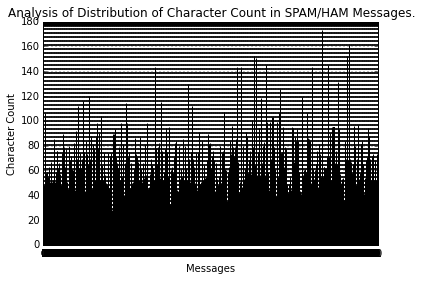

In [69]:
PlotCharCountInMsg(trainSubjects, YTrain)

### Analyze Importance of Capital Letters in Spam Messages

In [26]:
def AnalyzeCapitalLettersInMsg(XMessages, minLetteredWord = 3):
    countCapitalsInMsg = []
    for msg in XMessages:
        countCapitals = 0
        if not msg is None:
            wordList = msg.split()
            for word in wordList:
                if word.isupper() and len(word) > minLetteredWord:
                    countCapitals += 1
    #                 print word, True
        countCapitalsInMsg.append(countCapitals)
    return countCapitalsInMsg

In [27]:
countCapitalsInMsg = AnalyzeCapitalLettersInMsg(trainSubjects,3)
print countCapitalsInMsg

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 7, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 

### Features based on the Presence/Absence of a particular substring in the message.

In [28]:
def ChkPresenceOfStringFeat(XMessages, strXContainsList):
    XPGPSignFeature = []
    for msg in XMessages:
        if not msg is None:
            count = 0
            for strXContains in strXContainsList:
                count = msg.lower().count(strXContains)
                if (count>0):
                    break
            if (count>0):
                XPGPSignFeature.append(1)
            else:
                XPGPSignFeature.append(0)
            
    return XPGPSignFeature

### Presence/Absence of PGP SIGNATURE in the message body as a feature

In [29]:
ChkPresenceOfStringFeat(trainSubjects, "PGP SIGNATURE")

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [30]:
strSpamWordsList =  ["[spam]", "sex", "viagra", "money", "prize", "lottery", "jackpot", "replica"]
ChkPresenceOfStringFeat(trainSubjects, strSpamWordsList)

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


### Use different classifiers to train the model.

### Naive Bayes Classifier on Email Subjects

In [64]:
#Naive Bayes Classifier
##http://airccse.org/journal/jcsit/0211ijcsit12.pdf
def classifySpamHam(XTrain, XTest, YTrain, YTest, params):
#     print XTest.shape, XTrain.shape, YTrain.shape, YTest.shape
    folder = params['folder']
    fileString = params['fileString']
    threshold = params['threshold']
    XTrainSubjects = readSubjects(XTrain, folder, fileString)
    XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
    SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
#     print len(SubjectWordsSpamicity)
#     print SubjectWordsSpamicity
#     for subject in XTrainSubjects:
#         spam,ham = computeSpamHamMetrics(subject)
    XTestSubjects = readSubjects(XTest, folder, fileString)
    YPred = []
    for subject in XTestSubjects:
        spam, ham = computeSpamHamMetrics(subject,SubjectWordsSpamicity)
        spamminess = (1 + spam - ham)/2
        if spamminess > threshold:
            YPred.append(0)
        else:
            YPred.append(1)
#         if spam > ham:
#             YPred.append(0)
#         else:
#             YPred.append(1)
    YPred = np.array(YPred)    
#     print YPred.shape
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)


### Naive Bayes Classifier on Email Body

In [40]:
# Naive Bayes Classifier
## http://airccse.org/journal/jcsit/0211ijcsit12.pdf
def classifyBodySpamHam(XTrain, XTest, YTrain, YTest, params):
    folder = params['folder']
    fileString = params['fileString']
    XTrainBody = readEmailBody(XTrain, folder, fileString)
    XFeaturesBodySpam, XFeaturesBodyHam = AnalyseWordLabelContribution(XTrainBody, YTrain)
    BodyWordsSpamicity = computeSpamicityWords(XFeaturesBodySpam, XFeaturesBodyHam)

    XTestBody = readEmailBody(XTest, folder, fileString)
    YPred = []
    for body in XTestBody:
        spam, ham = computeSpamHamMetrics(body,BodyWordsSpamicity)
        if spam > ham:
            YPred.append(0)
        else:
            YPred.append(1)
    YPred = np.array(YPred)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

### Naive Bayes Classifier on Email

In [49]:
# Naive Bayes Classifier
## http://airccse.org/journal/jcsit/0211ijcsit12.pdf
def classifyCombinedSpamHam(XTrain, XTest, YTrain, YTest, params):
    folder = params['folder']
    fileString = params['fileString']
    XTrainBody = readEmailBody(XTrain, folder, fileString)
#     XFeaturesBodySpam, XFeaturesBodyHam = AnalyseWordLabelContribution(XTrainBody, YTrain)
#     BodyWordsSpamicity = computeSpamicityWords(XFeaturesBodySpam, XFeaturesBodyHam)
    XTestBody = readEmailBody(XTest, folder, fileString)
    
    XTrainSubjects = readSubjects(XTrain, folder, fileString)
#     XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
#     SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
    XTestSubjects = readSubjects(XTest, folder, fileString)
    
    XTrainFeatures = []
    XTestFeatures = []
    for i in xrange(len(XTrainBody)):
        if XTrainSubjects[i] and XTrainBody[i]:
            XTrainFeatures.append(XTrainSubjects[i]+XTrainBody[i])
        elif XTrainSubjects[i]:
            XTrainFeatures.append(XTrainSubjects[i])
        elif XTrainBody[i]:
            XTrainFeatures.append(XTrainBody[i])
        
    for i in xrange(len(XTestBody)):
        if XTestSubjects[i] and XTestBody[i]:
            XTestFeatures.append(XTestSubjects[i]+XTestBody[i])   
        elif XTestSubjects[i]:
            XTestFeatures.append(XTestSubjects[i])   
        elif XTestBody[i]:
            XTestFeatures.append(XTestBody[i])   
    
    XFeaturesSpam, XFeaturesHam = AnalyseWordLabelContribution(XTrainFeatures, YTrain)
    XWordsSpamicity = computeSpamicityWords(XFeaturesSpam, XFeaturesHam)
   
    YPred = []
#     for i in xrange(len(XTestBody)):
#         body = XTestBody[i]
#         subject = XTestSubjects[i]
#         spamB, hamB = computeSpamHamMetrics(body,BodyWordsSpamicity)
#         spamS, hamS = computeSpamHamMetrics(subject,SubjectWordsSpamicity)
#         spam = spamB * spamS
#         ham = hamB * hamS
    for test in XTestFeatures:
        spam, ham = computeSpamHamMetrics(test, XWordsSpamicity)
        if spam > ham:
            YPred.append(0)
        else:
            YPred.append(1)
    YPred = np.array(YPred)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [33]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest,trees=100,crit='gini'):
def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest, params):
    trees = params['trees']
    crit = params['criterion']
    seed = params['random_state']
    clf = RandomForestClassifier(n_estimators=trees,criterion=crit, random_state=seed )
    clf.fit(XTrain, YTrain)
    YPred = clf.predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [34]:
# Multi Class SVM
from sklearn import svm
def classifyMultiClassSVMClassifier(XTrain, XTest, YTrain, YTest, params):
    ker = params['kernel']
    YPred = svm.SVC(kernel=ker).fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [35]:
# K Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
def classifyKNNClassifier(XTrain, XTest, YTrain, YTest, params):
    neighbours = params['neighbours']
    neigh = KNeighborsClassifier(n_neighbors=neighbours)
    YPred = neigh.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

### Stratified K Fold Cross Validation

In [36]:
from sklearn.cross_validation import StratifiedKFold
def stratifiedKFoldVal(XTrain, YTrain, classify, params):
    n_folds = 5
    score = 0.0
    skf = StratifiedKFold(YTrain, n_folds)
    for train_index, test_index in skf:
        X_train, X_test = XTrain[train_index], XTrain[test_index]
        y_train, y_test = YTrain[train_index], YTrain[test_index]
        score += classify(X_train, X_test,  y_train, y_test, params)
    return score/n_folds

### Write Predicted Output Labels to File

In [33]:
def writePredictedLabelFile(YPred):
    f = open("Predictions.csv","w")
    f.write("Id,Prediction" + "\n")
    for i in xrange(len(YPred)):
        f.write(str(i+1) + "," + str(int(YPred[i]))+ "\n")
    f.close()

### Classifier on Email Subject

In [65]:
params = {'folder':trainFolder,'fileString':'TRAIN_', 'threshold':0.5}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifySpamHam, params)
print score

87.3623792095


In [103]:
XTrainSubjects = readSubjects(XTrainFileNames, trainFolder, fileString='TRAIN_')
XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
XTestSubjects = readSubjects(XTestFileNames, testFolder, fileString='TEST_')
YPred = []
for subject in XTestSubjects:
    spam, ham = computeSpamHamMetrics(subject,SubjectWordsSpamicity)
    if spam > ham:
        YPred.append(0)
    else:
        YPred.append(1)
YPred = np.array(YPred)    
writePredictedLabelFile(YPred)

87.3623792095


### Classifier on Email Body

In [39]:
params = {'folder':trainFolder,'fileString':'TRAIN_'}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyBodySpamHam, params)
print score

64.9601828807


In [108]:
XTrainBody = readEmailBody(XTrainFileNames, trainFolder, fileString='TRAIN_')
XFeaturesBodySpam, XFeaturesBodyHam = AnalyseWordLabelContribution(XTrainBody, YTrain)
BodyWordsSpamicity = computeSpamicityWords(XFeaturesBodySpam, XFeaturesBodyHam)
XTestBody = readEmailBody(XTestFileNames, testFolder, fileString='TEST_')
YPred = []
for body in XTestBody:
    spam, ham = computeSpamHamMetrics(body,BodyWordsSpamicity)
    if spam > ham:
        YPred.append(0)
    else:
        YPred.append(1)
YPred = np.array(YPred)    
writePredictedLabelFile(YPred)

### Classifier on Email Body & Message

In [50]:
params = {'folder':trainFolder,'fileString':'TRAIN_'}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifyCombinedSpamHam, params)
print score

64.9197031988


In [108]:
XTrainBody = readEmailBody(XTrainFileNames, trainFolder, fileString='TRAIN_')
XFeaturesBodySpam, XFeaturesBodyHam = AnalyseWordLabelContribution(XTrainBody, YTrain)
BodyWordsSpamicity = computeSpamicityWords(XFeaturesBodySpam, XFeaturesBodyHam)
XTestBody = readEmailBody(XTestFileNames, testFolder, fileString='TEST_')
YPred = []
for body in XTestBody:
    spam, ham = computeSpamHamMetrics(body,BodyWordsSpamicity)
    if spam > ham:
        YPred.append(0)
    else:
        YPred.append(1)
YPred = np.array(YPred)    
writePredictedLabelFile(YPred)

### Create Features based on Email message type for Random Forests.

In [131]:
def createFeaturesMsgTypeRF(readMsgType, createFeature):
    XTrainSubjects = readMsgType(XTrainFileNames, trainFolder, fileString='TRAIN_')
    XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
    SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
    XTrainSubjectFeatures = createFeature(XTrainSubjects, SubjectWordsSpamicity)
    print XTrainSubjectFeatures.shape
    print XTrainSubjectFeatures[:5]

    params = {'trees':200, 'criterion':'entropy', 'random_state':None}
    score = stratifiedKFoldVal(XTrainSubjectFeatures, YTrain, classifyRandomForestClassifier, params)
    print score

    XTestSubjects = readMsgType(XTestFileNames, testFolder, fileString='TEST_')
    XTestSubjectFeatures = createFeature(XTestSubjects, SubjectWordsSpamicity)
    print XTestSubjectFeatures.shape
    print XTestSubjectFeatures[:5]

    clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
    clf.fit(XTrainSubjectFeatures, YTrain)
    YPred = clf.predict(XTestSubjectFeatures)
    writePredictedLabelFile(YPred)
    return XTrainSubjectFeatures, XTestSubjectFeatures

### Create Spam Ham Features based on Email Subject for Random Forests.

In [132]:
XTrainSubjectFeatures, XTestSubjectFeatures = createFeaturesMsgTypeRF(readSubjects, createSpamHamFeature)

(2500, 2)
[[  5.57871157e-04   1.83329509e-04]
 [  1.41154168e-02   0.00000000e+00]
 [  9.30416200e-06   1.94081426e-01]
 [  5.08641975e-01   0.00000000e+00]
 [  4.52483370e-02   0.00000000e+00]]
93.473262373
(1827, 2)
[[ 0.01929326  0.23070674]
 [ 0.00482331  0.05767669]
 [ 0.01929326  0.23070674]
 [ 0.21992481  0.        ]
 [ 0.03853348  0.09343434]]


### Create Spam Ham Features based on Email Body for Random Forests.

In [133]:
XTrainBodyFeatures, XTestBodyFeatures = createFeaturesMsgTypeRF(readEmailBody, createSpamHamFeature)

(2500, 2)
[[  3.76943254e-226   0.00000000e+000]
 [  6.73293247e-015   0.00000000e+000]
 [  4.24441347e-268   1.64611890e-077]
 [  8.80603150e-005   0.00000000e+000]
 [  1.49924796e-021   0.00000000e+000]]
71.8008347233
(1827, 2)
[[  1.95909328e-091   0.00000000e+000]
 [  2.72941423e-103   0.00000000e+000]
 [  1.19913500e-246   0.00000000e+000]
 [  3.99962579e-242   0.00000000e+000]
 [  4.87854493e-115   0.00000000e+000]]


### Create Spam Ham Features based on both Email Subject and Body for Random Forests.

In [136]:
def concatenatedFeaturesRF(XTrainSubjectFeatures, XTrainBodyFeatures, XTestSubjectFeatures, XTestBodyFeatures):
    XTrainConcatenatedFeatures = np.hstack((XTrainSubjectFeatures, XTrainBodyFeatures))
    params = {'trees':200, 'criterion':'entropy', 'random_state':None}
    score = stratifiedKFoldVal(XTrainConcatenatedFeatures, YTrain, classifyRandomForestClassifier, params)
    print score
    XTestConcatenatedFeatures = np.hstack((XTestSubjectFeatures, XTestBodyFeatures))
    clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
    clf.fit(XTrainConcatenatedFeatures, YTrain)
    YPred = clf.predict(XTestConcatenatedFeatures)
    writePredictedLabelFile(YPred)

In [137]:
concatenatedFeaturesRF(XTrainSubjectFeatures, XTrainBodyFeatures, XTestSubjectFeatures, XTestBodyFeatures)

93.9131020524


### Create Ratio of Spam words as Features based on Email Subject for Random Forests.

In [152]:
XTrainSubjectFeatures1, XTestSubjectFeatures1 = createFeaturesMsgTypeRF(readSubjects, createSpamWordRatioFeature)

(2500, 1)
[[ 0.5]
 [ 0.5]
 [ 0. ]
 [ 1. ]
 [ 0.6]]
95.0736647747
(1827, 1)
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.8       ]
 [ 0.33333333]]


### Create Ratio of Spam words as Features based on Email Body for Random Forests.

In [156]:
XTrainBodyFeatures1, XTestBodyFeatures1 = createFeaturesMsgTypeRF(readEmailBody, createSpamWordRatioFeature)

(2500, 1)
[[ 0.32576985]
 [ 0.44897959]
 [ 0.04597701]
 [ 0.58823529]
 [ 0.30909091]]
98.8401580806
(1827, 1)
[[ 0.0955414 ]
 [ 0.03355705]
 [ 0.04748603]
 [ 0.39930955]
 [ 0.0939759 ]]


### Create Ratio of Spam words as Features based on both Email Subject and Body for Random Forests.

In [157]:
conctenatedFeaturesRF(XTrainSubjectFeatures1, XTrainBodyFeatures1, XTestSubjectFeatures1, XTestBodyFeatures1)

99.2389575958


### Selection of Nearest Neighbours for KNN

In [126]:
XTrainFeatures = XTrainConcatenatedFeatures
newYTrain = YTrain
selectNeighbourScores = []

params = {'neighbours':2}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':3}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':4}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':5}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':10}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':18}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':20}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':21}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':22}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

print selectNeighbourScores

93.3145439782
94.1138244553
94.073744295
94.673744615
94.9933441334
94.9534239737
94.953503814
95.0740649363
95.1540649363
[93.3145439781759, 94.11382445529782, 94.07374429497717, 94.67374461497846, 94.99334413337654, 94.95342397369589, 94.95350381401525, 95.07406493625975, 95.15406493625974]


### Features based on Email Subject for kNN Classifier.

In [117]:
params = {'neighbours':21}
score = stratifiedKFoldVal(XTrainSubjectFeatures, YTrain, classifyKNNClassifier, params)
print score

neighbours = params['neighbours']
neigh = KNeighborsClassifier(n_neighbors=neighbours)
YPred = neigh.fit(XTrainSubjectFeatures, YTrain).predict(XTestSubjectFeatures)
writePredictedLabelFile(YPred)

94.9939847759


### Features based on Email Body for kNN Classifier.

In [118]:
params = {'neighbours':21}
score = stratifiedKFoldVal(XTrainBodyFeatures, YTrain, classifyKNNClassifier, params)
print score

neighbours = params['neighbours']
neigh = KNeighborsClassifier(n_neighbors=neighbours)
YPred = neigh.fit(XTrainBodyFeatures, YTrain).predict(XTestBodyFeatures)
writePredictedLabelFile(YPred)

94.5592702371


### Features based on both Email Subject and Body for kNN Classifier.

In [127]:
XTrainConcatenatedFeatures = np.hstack((XTrainSubjectFeatures, XTrainBodyFeatures))
params = {'neighbours':21}
score = stratifiedKFoldVal(XTrainConcatenatedFeatures, YTrain, classifyKNNClassifier, params)
print score
print XTrainConcatenatedFeatures.shape

XTestConcatenatedFeatures = np.hstack((XTestSubjectFeatures, XTestBodyFeatures))

neighbours = params['neighbours']
neigh = KNeighborsClassifier(n_neighbors=neighbours)
YPred = neigh.fit(XTrainConcatenatedFeatures, YTrain).predict(XTestConcatenatedFeatures)
writePredictedLabelFile(YPred)

95.0740649363
(2500, 4)


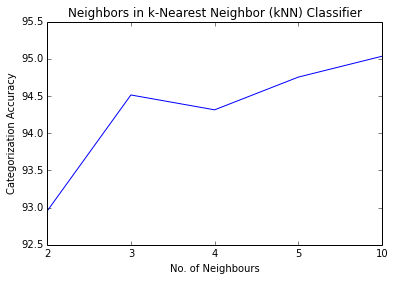

In [103]:
# Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(selectNeighbourScores, label = "Neighbors in k-Nearest Neighbor (kNN) Classifier")
plt.title("Neighbors in k-Nearest Neighbor (kNN) Classifier")

labels = [2,3,4,5,10]
plt.xticks(np.arange(len(labels)), labels, rotation='horizontal')
# plt.title("Optimal choice of Neighbors in k-Nearest Neighbor (kNN) Classifier")
plt.ylabel('Categorization Accuracy')
plt.xlabel('No. of Neighbours')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Hence, we choose k =  for our nearest neighbor classifier.

### Selection of Parameters for Random Forest

In [95]:
XTrainSubjects = readSubjects(XTrainFileNames, trainFolder, fileString='TRAIN_')
XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
XTrainSubjectFeatures = createSpamHamFeature(XTrainSubjects, SubjectWordsSpamicity)

XTestSubjects = readSubjects(XTestFileNames, testFolder, fileString='TEST_')
XTestSubjectFeatures = createSpamHamFeature(XTestSubjects, SubjectWordsSpamicity)

XTrainFeatures = XTrainSubjectFeatures
newYTrain = YTrain

In [96]:

selectRandomForestScores = []

params = {'trees':200, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':100, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':500, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':50, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':150, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':250, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':200, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':100, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':500, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':50, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':150, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':250, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

print selectRandomForestScores

93.4331023724
93.3529420518
93.3931023724
93.4328622114
93.3931023724
93.3931023724
93.3530222121
93.3129420518
93.3531023724
93.1930218921
93.3129420518
93.3530222121
[93.4331023724095, 93.35294205176821, 93.39310237240949, 93.43286221144885, 93.39310237240949, 93.39310237240949, 93.35302221208885, 93.3129420517682, 93.3531023724095, 93.19302189208756, 93.3129420517682, 93.35302221208885]


In [97]:
# Plotting the results
import matplotlib.pyplot as plt
#%matplotlib inline
plt.plot(selectRandomForestScores, label = "Random Forest Classifier")
plt.title("Random Forest Classifier")

labels = ['200 Trees + entropy', '100 Trees + entropy', '500 Trees + entropy', '50 Trees + entropy', '150 Trees + entropy','250 Trees + entropy',
          '200 Trees + gini', '100 Trees + gini', '500 Trees + gini', '50 Trees + gini','150 Trees + gini','250 Trees + gini']

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Scores')
plt.xlabel('Parameters')
# Place a legend to the right of this smaller figure.
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Selection of Kernel for Multi Class SVM

In [100]:

selectKernelScores = []

params = {'kernel':'poly'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)

params = {'kernel':'linear'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)

params = {'kernel':'rbf'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)

73.1977956712
84.7946898988
84.9946898988


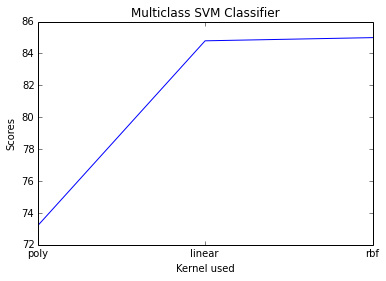

In [101]:
# Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(selectKernelScores, label = "Multiclass SVM Classifier")

labels = ['poly','linear','rbf']
plt.title("Multiclass SVM Classifier")
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='horizontal')

plt.ylabel('Scores')
plt.xlabel('Kernel used')
# Place a legend to the right of this smaller figure.
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Graphs depicting Categorization Accuracy scores on KFold Stratified Validation on Train data for:

In [12]:
print scoreRandomForestClassifier
print scoreKNNClassifier
print scoreMultiClassSVMClassifier# Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scoreRandomForestClassifier, label = "Random Forest Classifier")
plt.plot(scoreMultiClassSVMClassifier, label = "Multiclass Linear SVM Classifier")
plt.plot(scoreKNNClassifier, label = "KNN Classifier")

labels = ['Limited AVs(Binary Encoding)', 'All AVs(Binary Encoding)', 'All AVs(Frequency Encoding)', 'PE Info(Entropy Mean)', 
          'All AVs(Binary Encoding) + Entropy Mean','All AVs(Frequency Encoding) + Entropy Mean']

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Scores')
plt.xlabel('Feature Encoding used')
# Place a legend to the right of this smaller figure.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

NameError: name 'scoreRandomForestClassifier' is not defined

## Final evaluation results on Kaggle

### Bar graph depicting Public vs Private Categorization Accuracy Scores on the different Models.

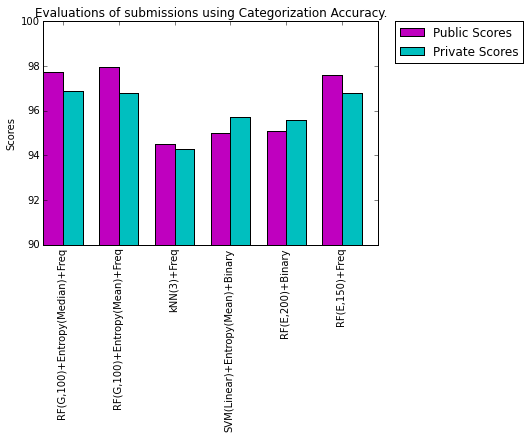

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 6
publicScore = (97.733, 97.971, 94.511, 94.988, 95.107, 97.613)
privateScore = (96.897, 96.778, 94.272, 95.704, 95.585, 96.778,)
modelNames = ('RF(G,100)+Entropy(Median)+Freq', 'RF(G,100)+Entropy(Mean)+Freq', 'kNN(3)+Freq', 
              'SVM(Linear)+Entropy(Mean)+Binary', 'RF(E,200)+Binary', 'RF(E,150)+Freq')

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, publicScore, width, color='m')

rects2 = ax.bar(ind + width, privateScore, width, color='c')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Evaluations of submissions using Categorization Accuracy.')
ax.set_xticks(ind + width)
ax.set_xticklabels(modelNames,  rotation='vertical')
ax.set_ylim(90,100)

# def autolabel(rects):
#     # attach some text labels
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

# Place a legend to the right of this smaller figure.
ax.legend((rects1[0], rects2[0]), ('Public Scores', 'Private Scores'), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [20]:
import pyvw

In [21]:
testSubjects = readSubjects(XTestFileNames, testFolder, 'TEST_')

In [22]:
print len(trainSubjects), len(trainEmailBody)
print len(testEmailBody), len(testSubjects)
print len(YTrain)

2500 2500
1827 1827
2500


In [23]:
print type(YTrain)
print YTrain[2]
print type(trainSubjects), trainSubjects[2]

<type 'numpy.ndarray'>
1
<type 'list'> Re: How to manage multiple Internet connections?


In [24]:
# f = open('trainSubjects.txt','wb')
trainVW = []
for i in xrange(len(trainSubjects)):
    if YTrain[i] == 0:
        Y = -1
    else:
        Y = 1
    if trainSubjects[i]:
        trainVW.append((Y,''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r')))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
    else:
        trainVW.append((Y,''))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
# f.close()
print len(trainVW)
print trainVW[0]


2500
(-1, 'One of a kind Money maker! Try it for free!')


In [25]:
# f = open('testSubjects.txt','wb')
testVW = []
for i in xrange(len(testSubjects)):
    if testSubjects[i]:
        testVW.append((0,''.join(c for c in testSubjects[i] if c not in ':|\n\t\r')))
#         f.write(':' + '|' + str(i+1) + ' subject:' + ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') +'\r')
    else:
        testVW.append((0,''))
#         f.write(':' + '|' + str(i+1) + ' subject:' +'\r')
# f.close()
print len(testVW)
print testVW[0]

1827
(0, 'Re Apple Sauced...again')


In [35]:
# f = open('trainSubjects.txt','wb')
trainVW = []
for i in xrange(len(trainEmailBody)):
    if YTrain[i] == 0:
        Y = -1
    else:
        Y = 1
    if trainEmailBody[i]:
        trainVW.append((Y,''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
    else:
        trainVW.append((Y,''))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
# f.close()
print len(trainVW)
print trainVW[0]


2500
(-1, '<body lang=EN-US><div class=Section1><p class=MsoBodyText style=\'text-alignjustify\'><b>CONSANTLY</b> beingbombarded by so-called \x93FREE\x94 money-making systems that teases you with limitedinformation, and when it\x92s all said and done, blind-sides you by demanding yourmoney/credit card information upfront in some slick way,<b> after-the-fact</b>!Yes, I too was as skeptical about such offers and the Internet in general withall its hype, as you probably are. Fortunate for me, my main businessslowed-down (<i>I have been self-employed all my life</i>), so I looked forsomething to fit my lifestyle and some other way to assist me in paying mybills, without working myself to death or loosing more money; then, thisproposal to try something new without any upfront investment (<i>great! becauseI had none</i>) interested me to click on the link provided. And I don\x92t regretat all that I did! I am very happy, and happy enough to recommend it to you asa system that is true to its

In [36]:
# f = open('testSubjects.txt','wb')
testVW = []
for i in xrange(len(testEmailBody)):
    if testSubjects[i]:
        testVW.append((0,''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')))
#         f.write(':' + '|' + str(i+1) + ' subject:' + ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') +'\r')
    else:
        testVW.append((0,''))
#         f.write(':' + '|' + str(i+1) + ' subject:' +'\r')
# f.close()
print len(testVW)
print testVW[0]

1827
(0, 'At 116 AM -0400 on 10/3/02, Gary Lawrence Murphy wrote>   "The first question I ask myself when something doesn\'t seem to be>   beautiful is why do I think it\'s not beautiful. And very shortly you>   discover that there is no reason." -- John Cage"When I\'m working on a problem, I never think about beauty. I think onlyhow to solve the problem. But when I have finished, if the solution is notbeautiful, I know it is wrong."  -- R. Buckminster Fuller"Simplicity is the highest goal, achievable when you have overcome alldifficulties." -- Frederic Chopin"Externalities are the last refuge of the dirigistes." -- Friedrich Hayek-- -----------------R. A. Hettinga <mailto rah@ibuc.com>The Internet Bearer Underwriting Corporation <http//www.ibuc.com/>44 Farquhar Street, Boston, MA 02131 USA"The stoical scheme of supplying our wants by lopping off ourdesires is like cutting off our feet when we want shoes." -- Jonathan Swift')


In [42]:
# f = open('trainSubjects.txt','wb')
trainVW = []
for i in xrange(len(trainEmailBody)):
    if YTrain[i] == 0:
        Y = -1
    else:
        Y = 1
    if trainEmailBody[i] and trainSubjects[i]:
        train = ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') + ' ' + ''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')
    elif trainSubjects[i]:
        train = ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r')
    elif trainEmailBody[i]:
        train = ''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')
    else:
        train = ''
    trainVW.append((Y,train))   
#     trainVW.append((Y,''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')))
#         #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
#     else:
#         trainVW.append((Y,''))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
# f.close()
print len(trainVW)
print trainVW[0]


2500
(-1, 'One of a kind Money maker! Try it for free! <body lang=EN-US><div class=Section1><p class=MsoBodyText style=\'text-alignjustify\'><b>CONSANTLY</b> beingbombarded by so-called \x93FREE\x94 money-making systems that teases you with limitedinformation, and when it\x92s all said and done, blind-sides you by demanding yourmoney/credit card information upfront in some slick way,<b> after-the-fact</b>!Yes, I too was as skeptical about such offers and the Internet in general withall its hype, as you probably are. Fortunate for me, my main businessslowed-down (<i>I have been self-employed all my life</i>), so I looked forsomething to fit my lifestyle and some other way to assist me in paying mybills, without working myself to death or loosing more money; then, thisproposal to try something new without any upfront investment (<i>great! becauseI had none</i>) interested me to click on the link provided. And I don\x92t regretat all that I did! I am very happy, and happy enough to recomm

In [43]:
# f = open('testSubjects.txt','wb')
testVW = []
for i in xrange(len(testEmailBody)):
    if testEmailBody[i] and testSubjects[i]:
        test = ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') + ' ' + ''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')
    elif testSubjects[i]:
        test = ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r')
    elif testEmailBody[i]:
        test = ''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')
    testVW.append((Y,test))  
#     if testSubjects[i]:
#         testVW.append((0,''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')))
# #         f.write(':' + '|' + str(i+1) + ' subject:' + ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') +'\r')
#     else:
#         testVW.append((0,''))
#         f.write(':' + '|' + str(i+1) + ' subject:' +'\r')
# f.close()
print len(testVW)
print testVW[0]

1827
(-1, 'Re Apple Sauced...again At 116 AM -0400 on 10/3/02, Gary Lawrence Murphy wrote>   "The first question I ask myself when something doesn\'t seem to be>   beautiful is why do I think it\'s not beautiful. And very shortly you>   discover that there is no reason." -- John Cage"When I\'m working on a problem, I never think about beauty. I think onlyhow to solve the problem. But when I have finished, if the solution is notbeautiful, I know it is wrong."  -- R. Buckminster Fuller"Simplicity is the highest goal, achievable when you have overcome alldifficulties." -- Frederic Chopin"Externalities are the last refuge of the dirigistes." -- Friedrich Hayek-- -----------------R. A. Hettinga <mailto rah@ibuc.com>The Internet Bearer Underwriting Corporation <http//www.ibuc.com/>44 Farquhar Street, Boston, MA 02131 USA"The stoical scheme of supplying our wants by lopping off ourdesires is like cutting off our feet when we want shoes." -- Jonathan Swift')


In [54]:
# f = open('trainSubjects.txt','wb')
trainVW = []
for i in xrange(len(trainEmailBody)):
    if YTrain[i] == 0:
        Y = -1
    else:
        Y = 1
    if trainEmailBody[i] and trainSubjects[i]:
        trainVW.append((Y,''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r'), 
                        ''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')))
    elif trainSubjects[i]:
        trainVW.append((Y,''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r'),''))
    elif trainEmailBody[i]:
        trainVW.append((Y,'',''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')))
    else:
        trainVW.append((Y,'',''))
#     trainVW.append((Y,train))   
#     trainVW.append((Y,''.join(c for c in trainEmailBody[i] if c not in ':|\n\t\r')))
#         #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
#     else:
#         trainVW.append((Y,''))
        #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
# f.close()
print len(trainVW)
print trainVW[0]


2500
(-1, 'One of a kind Money maker! Try it for free!', '<body lang=EN-US><div class=Section1><p class=MsoBodyText style=\'text-alignjustify\'><b>CONSANTLY</b> beingbombarded by so-called \x93FREE\x94 money-making systems that teases you with limitedinformation, and when it\x92s all said and done, blind-sides you by demanding yourmoney/credit card information upfront in some slick way,<b> after-the-fact</b>!Yes, I too was as skeptical about such offers and the Internet in general withall its hype, as you probably are. Fortunate for me, my main businessslowed-down (<i>I have been self-employed all my life</i>), so I looked forsomething to fit my lifestyle and some other way to assist me in paying mybills, without working myself to death or loosing more money; then, thisproposal to try something new without any upfront investment (<i>great! becauseI had none</i>) interested me to click on the link provided. And I don\x92t regretat all that I did! I am very happy, and happy enough to rec

In [55]:
# f = open('testSubjects.txt','wb')
testVW = []
for i in xrange(len(testEmailBody)):
    if testEmailBody[i] and testSubjects[i]:
        testVW.append((Y, ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') ,''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')))
    elif testSubjects[i]:
        testVW.append((Y,''.join(c for c in testSubjects[i] if c not in ':|\n\t\r'), ''))
    elif testEmailBody[i]:
        testVW.append((Y,'', ''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')))
    else:
        testVW.append((Y,'', ''))        
#     testVW.append((Y,test))  
#     if testSubjects[i]:
#         testVW.append((0,''.join(c for c in testEmailBody[i] if c not in ':|\n\t\r')))
# #         f.write(':' + '|' + str(i+1) + ' subject:' + ''.join(c for c in testSubjects[i] if c not in ':|\n\t\r') +'\r')
#     else:
#         testVW.append((0,''))
#         f.write(':' + '|' + str(i+1) + ' subject:' +'\r')
# f.close()
print len(testVW)
print testVW[0]

1827
(-1, 'Re Apple Sauced...again', 'At 116 AM -0400 on 10/3/02, Gary Lawrence Murphy wrote>   "The first question I ask myself when something doesn\'t seem to be>   beautiful is why do I think it\'s not beautiful. And very shortly you>   discover that there is no reason." -- John Cage"When I\'m working on a problem, I never think about beauty. I think onlyhow to solve the problem. But when I have finished, if the solution is notbeautiful, I know it is wrong."  -- R. Buckminster Fuller"Simplicity is the highest goal, achievable when you have overcome alldifficulties." -- Frederic Chopin"Externalities are the last refuge of the dirigistes." -- Friedrich Hayek-- -----------------R. A. Hettinga <mailto rah@ibuc.com>The Internet Bearer Underwriting Corporation <http//www.ibuc.com/>44 Farquhar Street, Boston, MA 02131 USA"The stoical scheme of supplying our wants by lopping off ourdesires is like cutting off our feet when we want shoes." -- Jonathan Swift')


In [44]:
import pyvw
examples = []
examples.append((1, "This is spam."))
examples.append((-1, "This is ham."))

vw = pyvw.vw("--passes 300 --ngram 3 --loss_function=logistic --link=logistic --binary --cache_file test.cache ")
for text in examples:
    # using dictionary instead of string " |s This is spam."
    ex = vw.example({"s": text[1]}) 
    ex.set_label_string(str(text[0])) 
    ex.learn()

test = vw.example(" | This is also spam.")
test.learn() 
print test.get_updated_prediction() #<-- usually 0.0
print test.get_simplelabel_prediction() #<-- the same for every prediction?
test = vw.example(" | This is certainly ham.")
test.learn() 
print test.get_updated_prediction() #<-- usually 0.0
print test.get_simplelabel_prediction() #<-- the same for every prediction? 

0.0
1.0
0.0
1.0


In [45]:
import pyvw
# vw = pyvw.vw("--passes 300 --ngram 3 --loss_function=logistic --link=logistic --binary --cache_file test.cache ")
# vw = pyvw.vw("--loss_function=logistic --ngram 3 -l2 0.0000001 --ring_size 2048")
vw = pyvw.vw()
for train in trainVW:
    # using dictionary instead of string " |s This is spam."
#     ex = vw.example({"s": train[1]}) 
#     ex.set_label_string(str(train[0])) 
#     ex.learn()
    ex = vw.example(str(train[0]) + " | " + train[1])
    ex.learn()
YPred = []
for test in testVW:
    ex1 = vw.example(" | " + test[1])
    ex1.learn() 
    print ex1.get_updated_prediction(),ex1.get_simplelabel_prediction() #<-- the same for every prediction?
    if ex1.get_simplelabel_prediction() > 0:
        YPred.append(1)
    else:
        YPred.append(0)

print len(YPred)
writePredictedLabelFile(YPred)

#     YPred = 
#     test = vw.example(" | This is certainly ham.")
#     test.learn() 
# print test.get_updated_prediction() #<-- usually 0.0
# print test.get_simplelabel_prediction() #<-- the same for every prediction? 

0.0 4.97534608841
0.0 5.24878072739
0.0 7.12763643265
0.0 -3.49651312828
0.0 -1.78034377098
0.0 -7.69851160049
0.0 -15.7338418961
0.0 3.02921462059
0.0 2.44113707542
0.0 4.16618728638
0.0 4.55006790161
0.0 -18.4714202881
0.0 -3.41142463684
0.0 0.989662885666
0.0 11.5992174149
0.0 2.92909932137
0.0 7.40959501266
0.0 14.0872325897
0.0 -5.31505012512
0.0 0.82640260458
0.0 -15.1172323227
0.0 11.1291246414
0.0 -20.1963233948
0.0 -13.01770401
0.0 7.99562835693
0.0 8.08570957184
0.0 -8.27825450897
0.0 5.55351400375
0.0 6.90430545807
0.0 2.22093582153
0.0 2.19068050385
0.0 1.27363288403
0.0 6.5115275383
0.0 7.33732366562
0.0 0.0801547989249
0.0 11.2568826675
0.0 4.43709230423
0.0 0.134840011597
0.0 2.67114686966
0.0 -10.7198143005
0.0 13.1533870697
0.0 -4.33955049515
0.0 2.62378406525
0.0 -3.04514980316
0.0 5.05363225937
0.0 3.6147069931
0.0 4.70460414886
0.0 6.31659412384
0.0 1.25813102722
0.0 5.57178211212
0.0 2.30938363075
0.0 7.10589981079
0.0 6.78376817703
0.0 1.84233403206
0.0 10.8981513

In [56]:
import pyvw
# vw = pyvw.vw("--passes 300 --ngram 3 --loss_function=logistic --link=logistic --binary --cache_file test.cache ")
# vw = pyvw.vw("--loss_function=logistic --ngram 3 -l2 0.0000001 --ring_size 2048")
vw = pyvw.vw()
for train in trainVW:
    # using dictionary instead of string " |s This is spam."
#     ex = vw.example({"s": train[1]}) 
#     ex.set_label_string(str(train[0])) 
#     ex.learn()
    ex = vw.example(str(train[0]) + " | " + train[1] + " | " + train[2])
    ex.learn()
YPred = []
for test in testVW:
    ex1 = vw.example(" | " + test[1] + " | " + test[2])
    ex1.learn() 
    print ex1.get_updated_prediction(),ex1.get_simplelabel_prediction() #<-- the same for every prediction?
    if ex1.get_simplelabel_prediction() > 0:
        YPred.append(1)
    else:
        YPred.append(0)

print len(YPred)
writePredictedLabelFile(YPred)

#     YPred = 
#     test = vw.example(" | This is certainly ham.")
#     test.learn() 
# print test.get_updated_prediction() #<-- usually 0.0
# print test.get_simplelabel_prediction() #<-- the same for every prediction? 

0.0 1.0
0.0 1.0
0.0 1.0
0.0 -1.0
0.0 -0.527947187424
0.0 -1.0
0.0 -1.0
0.0 0.956050634384
0.0 0.833381175995
0.0 1.0
0.0 0.867170453072
0.0 -1.0
0.0 -1.0
0.0 0.487943589687
0.0 1.0
0.0 0.91165137291
0.0 1.0
0.0 1.0
0.0 -1.0
0.0 0.454314172268
0.0 -1.0
0.0 1.0
0.0 -1.0
0.0 -1.0
0.0 1.0
0.0 1.0
0.0 -1.0
0.0 1.0
0.0 1.0
0.0 0.246712595224
0.0 0.575222849846
0.0 0.490419387817
0.0 1.0
0.0 1.0
0.0 -0.0224203169346
0.0 1.0
0.0 0.95324075222
0.0 -0.0962494015694
0.0 0.742404460907
0.0 -1.0
0.0 1.0
0.0 -1.0
0.0 0.741846680641
0.0 -0.77957046032
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.652179002762
0.0 1.0
0.0 -1.0
0.0 1.0
0.0 1.0
0.0 0.558432459831
0.0 1.0
0.0 -0.372804522514
0.0 -0.922606945038
0.0 -1.0
0.0 -1.0
0.0 -1.0
0.0 -1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.376158803701
0.0 1.0
0.0 -1.0
0.0 1.0
0.0 0.975569248199
0.0 1.0
0.0 -1.0
0.0 -0.376032888889
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.425877630711
0.0 0.94100356102
0.0 1.0
0.0 0.560189902782
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.

### Hence we conclude that the best model is Random Forest with Gini as criterion and 100 Trees using ... with Entropy Mean/Median and ... as features !